In [46]:
!pip install scikit-learn==1.6.1 --quiet
#import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline


In [47]:
import pandas as pd
heart_df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\project\data\Heart Disease Dataset.csv")


In [48]:
#information about the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
#describe the dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
heart_df.shape

(303, 14)

## Checking null values

In [51]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
heart_df.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [53]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## EDA

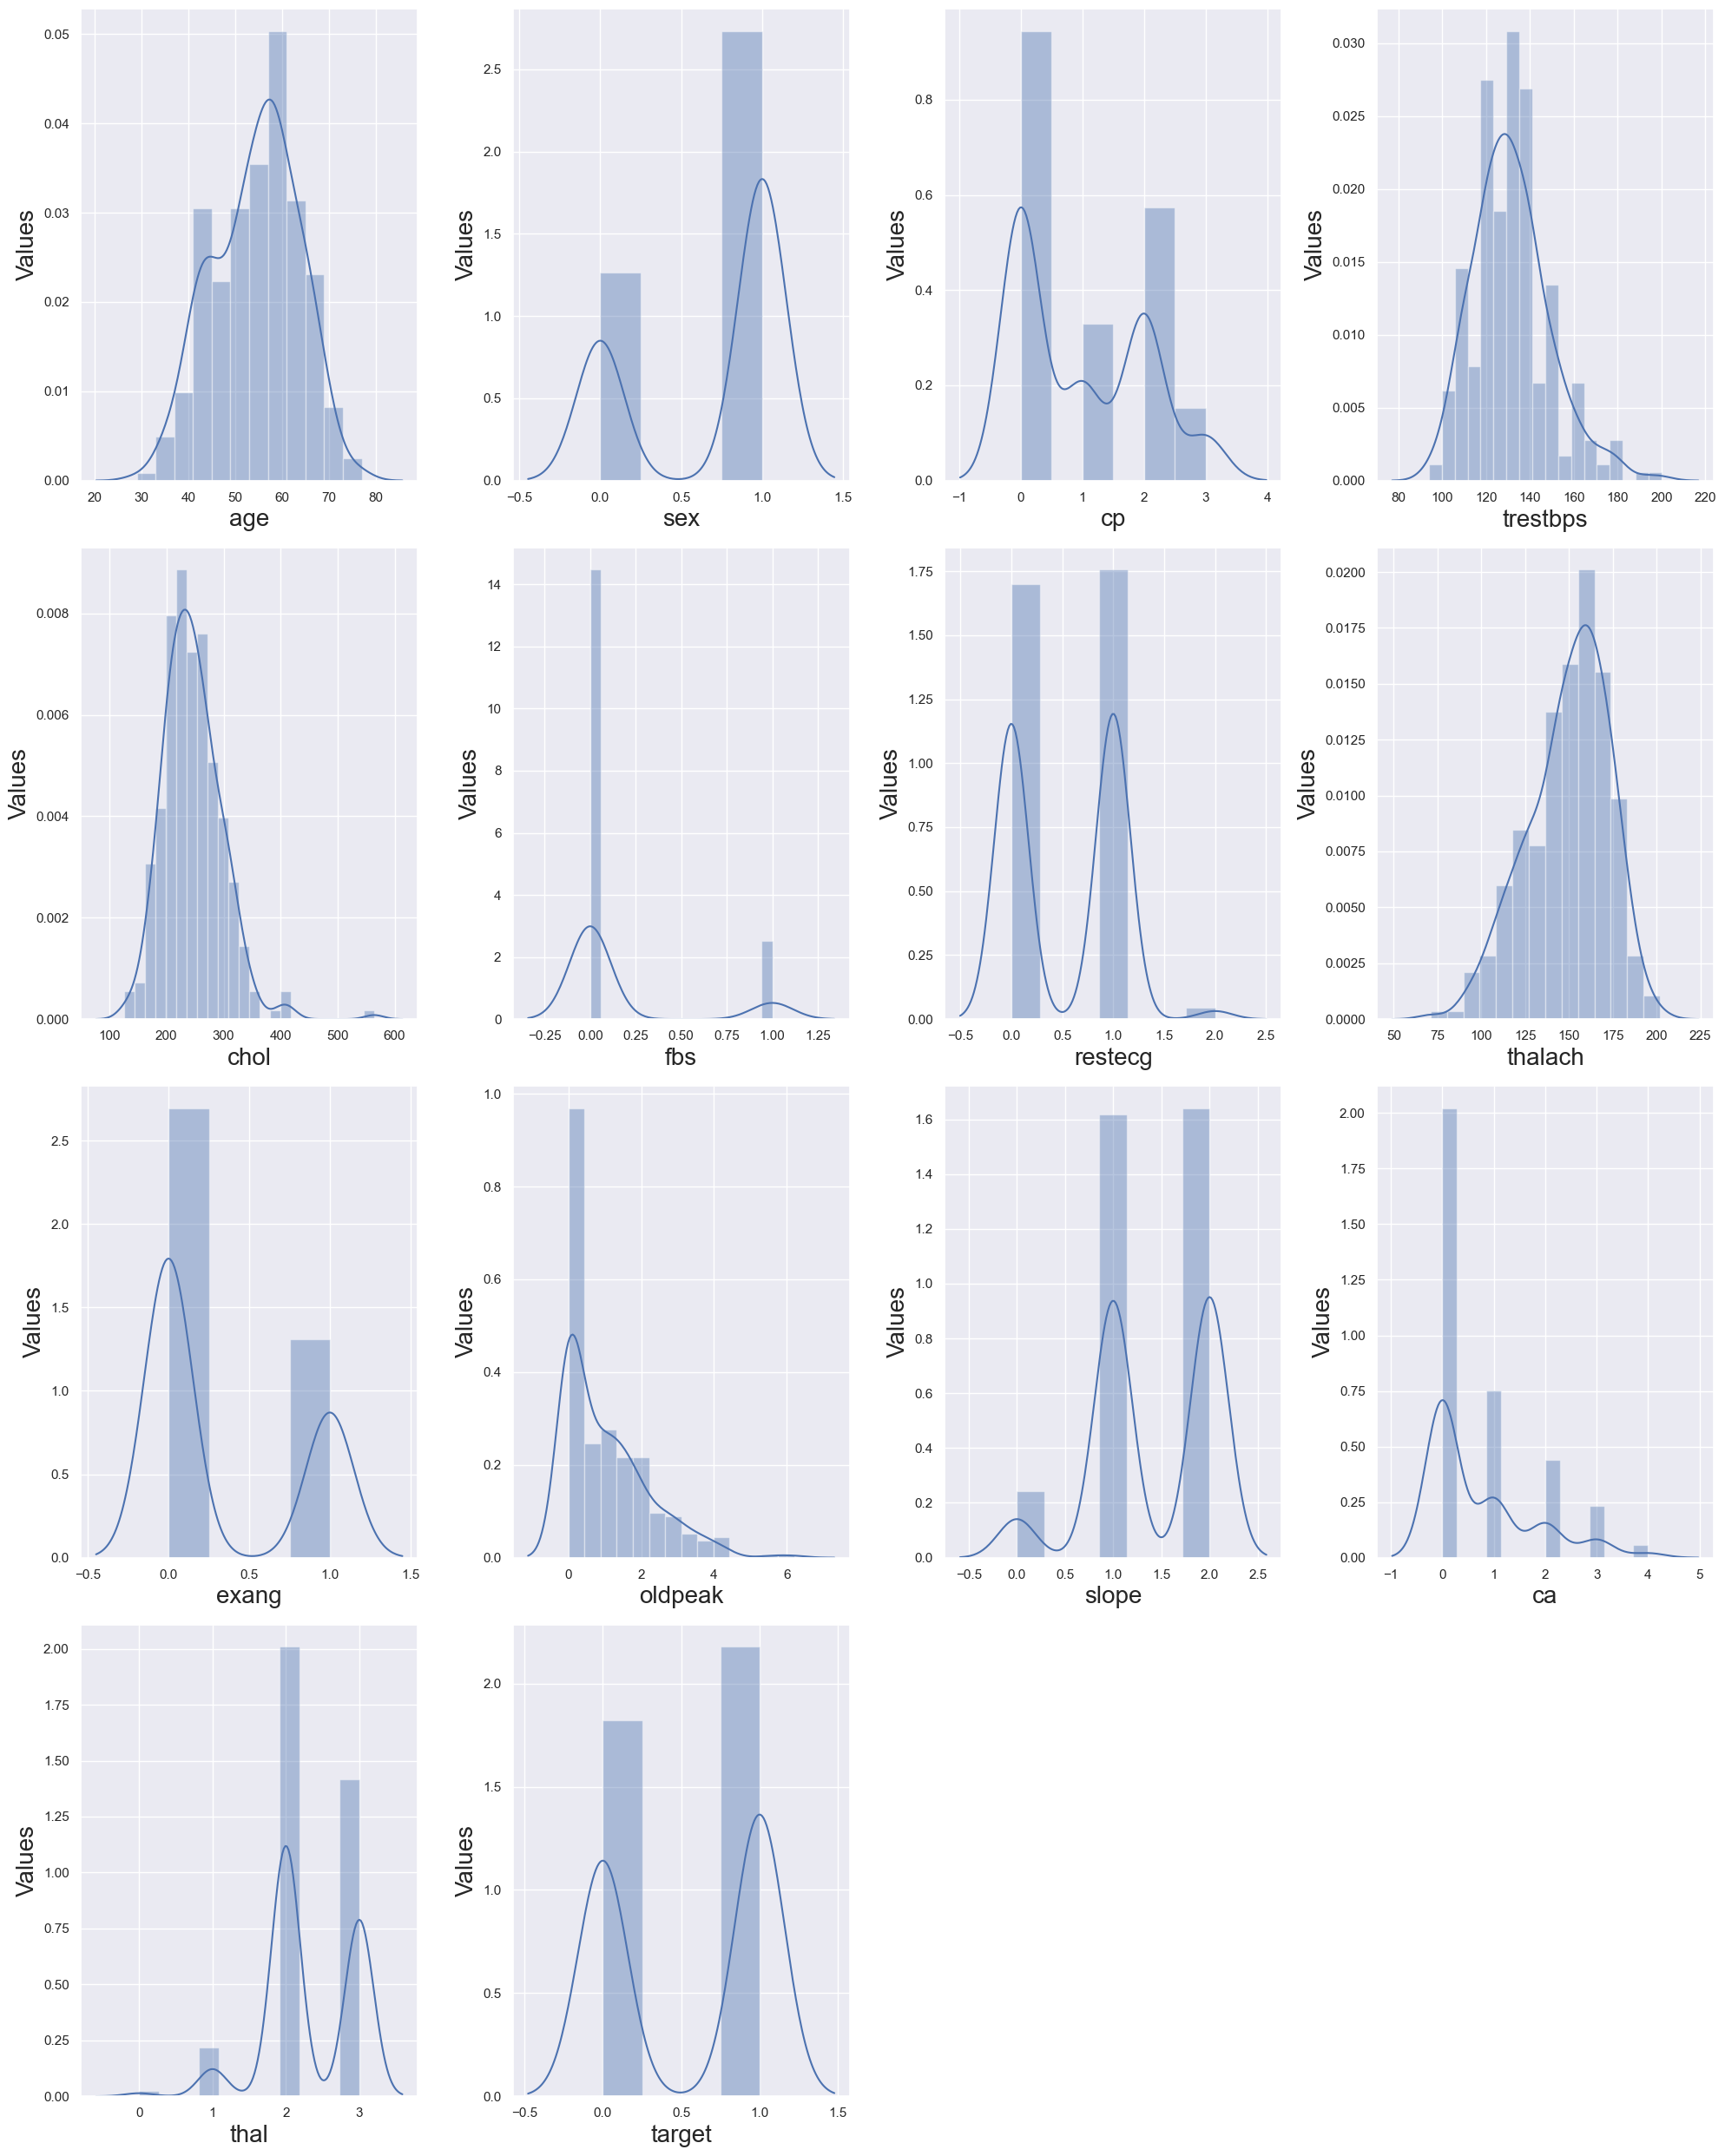

In [54]:
#plotting the distribution plot
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<=14:
        ax= plt.subplot(4,4, plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1

plt.tight_layout()
plt.show()

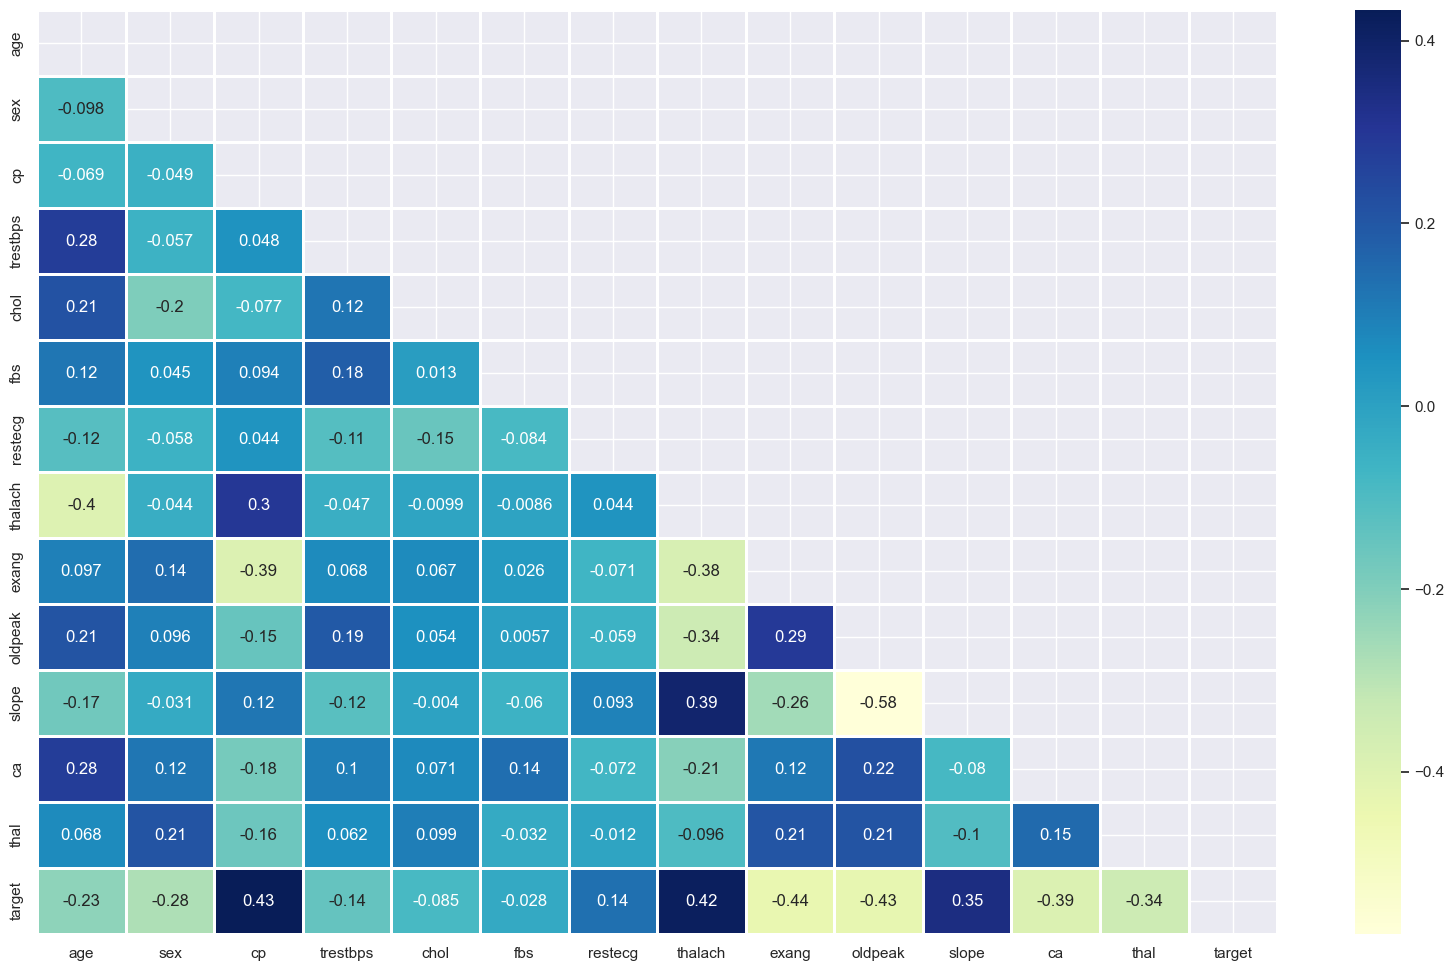

In [55]:
#heatmap
plt.figure(figsize=(20,12))
corr= heart_df.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True,fmt='.2g', cmap="YlGnBu")

plt.show()

In [56]:
# checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

## Normalisation 

In [57]:
heart_df['trestbps']= np.log(heart_df['trestbps'])
heart_df['chol']= np.log(heart_df['chol'])
heart_df['thalach']= np.log(heart_df['thalach'])

np.var(heart_df[["trestbps","chol","thalach"]])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [58]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
x= heart_df.drop('target',axis=1)
y= heart_df['target']

In [60]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state= 123)


# 1. Logistic Regression 

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred = log_reg.predict(x_test)

In [63]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,log_reg.predict(x_train)))

log_reg_acc= accuracy_score(y_test, log_reg.predict(x_test))
print(log_reg_acc)

y_pred= log_reg.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8726415094339622
0.7912087912087912
[[33 12]
 [ 7 39]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.76      0.85      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



# 2. KNearestNeighbors 

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred= knn.predict(x_test)

In [67]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train,knn.predict(x_train)))

knn_acc= accuracy_score(y_test, knn.predict(x_test))
print(knn_acc)

y_pred= knn.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.8726415094339622
0.7472527472527473
[[31 14]
 [ 9 37]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.73      0.80      0.76        46

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



## 3. Support Vector Classifier(SVC) 

In [69]:
from sklearn.svm import SVC 

svc=SVC()
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy score
print(accuracy_score(y_train,svc.predict(x_train)))

svc_acc= accuracy_score(y_test, svc.predict(x_test))
print(svc_acc)

#confusion matrix
y_pred= svc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6273584905660378
0.6043956043956044
[[17 28]
 [ 8 38]]
              precision    recall  f1-score   support

           0       0.68      0.38      0.49        45
           1       0.58      0.83      0.68        46

    accuracy                           0.60        91
   macro avg       0.63      0.60      0.58        91
weighted avg       0.63      0.60      0.58        91



## 4.  Decision Tree 

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc= DecisionTreeClassifier()

parameters={
    'criterion':['gini','entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_leaf': range(2,10,1),
    'min_samples_split':range(2,10,1),
    
}

grid_search_dt= GridSearchCV(dtc,parameters, cv=5,n_jobs=-1,verbose=1)
grid_search_dt.fit(x_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [72]:
# best parameters
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [73]:
#best accuracy
grid_search_dt.best_score_

0.8304540420819491

In [74]:
dtc= DecisionTreeClassifier(criterion='entropy', max_depth=5 ,min_samples_leaf=2 ,min_samples_split= 9)

In [75]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=9)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,dtc.predict(x_train)))

dtc_acc= accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)

#confusion matrix
y_pred= dtc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9150943396226415
0.7802197802197802
[[34 11]
 [ 9 37]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        45
           1       0.77      0.80      0.79        46

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



## 5. Random Forest Classifier 

In [77]:
from sklearn.ensemble import RandomForestClassifier

rand_clf=RandomForestClassifier(criterion='entropy', max_depth=7,max_features='sqrt' ,min_samples_leaf= 2,min_samples_split= 3, n_estimators=130)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [78]:
y_pred=rand_clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,rand_clf.predict(x_train)))

rand_clf_acc= accuracy_score(y_test, rand_clf.predict(x_test))
print(rand_clf_acc)

#confusion matrix
y_pred= rand_clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9716981132075472
0.8241758241758241
[[35 10]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.80      0.87      0.83        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



 ## 6. Gradient Boosting Classifier 
 

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier()

parameters={
    'loss':['deviance','exponential'],
    'learning_rate': [0.001,0.01,0.1,1,10],
    'n_estimators':[50,70,90,120,180,200]
}

grid_search_gbc= GridSearchCV(gbc,parameters, cv=5,n_jobs=-1, verbose=1)
grid_search_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [81]:
# best parameters
grid_search_gbc.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

In [82]:
#best accuracy
grid_search_gbc.best_score_

0.8355481727574752

In [83]:
gbc= GradientBoostingClassifier(learning_rate= 1, loss= 'exponential', n_estimators= 200)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [84]:
y_pred= gbc.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,gbc.predict(x_train)))

gbc_acc= accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)

#confusion matrix
y_pred= gbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.8131868131868132
[[34 11]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        45
           1       0.78      0.87      0.82        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



## 7. Stochastic Gradient Boosting(SGB)  

In [86]:
sgbc = GradientBoostingClassifier( max_depth=4, subsample=0.9,max_features=0.75 , n_estimators=200, random_state=0)
sgbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [87]:
y_pred= sgbc.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,sgbc.predict(x_train)))

sgbc_acc= accuracy_score(y_test, sgbc.predict(x_test))
print(sgbc_acc)

#confusion matrix
y_pred= sgbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.8131868131868132
[[34 11]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        45
           1       0.78      0.87      0.82        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [89]:
models= pd.DataFrame({
    'Model':['Logistic Regresion','KNN','SVC','Decision Tree Classifer','Random Forest Classifier',' Gradient Boosting Classifier ','Stochastic Gradient Boosting Classifier '],
    'Score': [log_reg_acc, knn_acc,svc_acc , dtc_acc, rand_clf_acc,gbc_acc,sgbc_acc]
})

models.sort_values(by= "Score", ascending=False)

,Model,Score
4,Random Forest Classifier,0.824176
5,Gradient Boosting Classifier,0.813187
6,Stochastic Gradient Boosting Classifier,0.813187
0,Logistic Regresion,0.791209
3,Decision Tree Classifer,0.780220
1,KNN,0.747253
2,SVC,0.604396


### Best model for Diagnosing Heart Disease is "Gradient Boosting Classifier"  with  accuracy of  81.3%.

In [90]:
import joblib
model = sgbc

joblib.dump(model, 'C:/Users/rohit/OneDrive/Desktop/project/models/Heart_Disease.pkl')


['C:/Users/rohit/OneDrive/Desktop/project/models/Heart_Disease.pkl']